In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 3: Perform Basic EDA
3.1: Summary of the Dataset

In [3]:
# Display basic information about the dataset
print("\nDataset Information:")
print(titanic_data.info())

# Check for missing values
print("\nMissing values in each column:")
print(titanic_data.isnull().sum())

# Display statistical summary of the dataset
print("\nStatistical Summary:")
print(titanic_data.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare          

Step 4: Visualizing Data Distributions Using matplotlib and seaborn
4.1: Histogram for Age and Fare

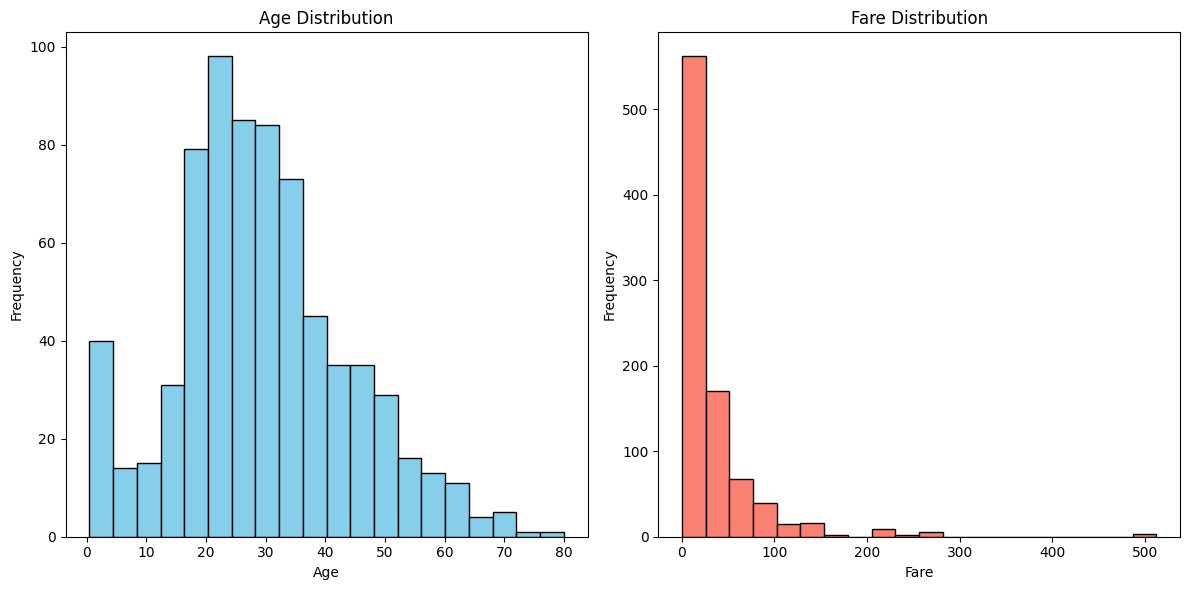

In [4]:
# Plot histogram for 'Age' and 'Fare' columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(titanic_data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(titanic_data['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


4.2: Scatter Plot for Age vs. Fare

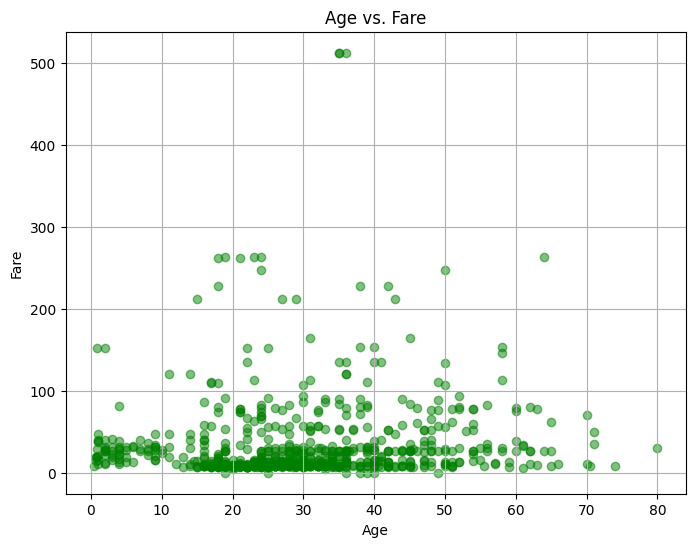

In [5]:
# Scatter plot to visualize Age vs. Fare
plt.figure(figsize=(8, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], alpha=0.5, color='green')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


4.3: Boxplot for Fare by Passenger Class

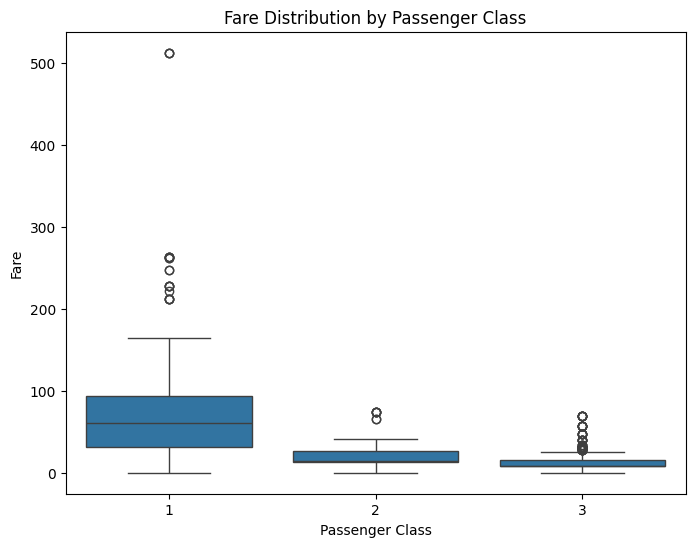

In [6]:
# Boxplot to compare Fare distribution by Passenger Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


Step 5: Feature Engineering
5.1: Create a New Feature - FamilySize

In [7]:
# Create a new feature 'FamilySize'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Display the first few rows to confirm the new feature
print(titanic_data[['SibSp', 'Parch', 'FamilySize']].head())


   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


5.2: Create a New Feature - IsAlone

In [8]:
# Create a new feature 'IsAlone'
titanic_data['IsAlone'] = 1  # Initialize to 1 (is alone)
titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0  # Update to 0 if FamilySize > 1

# Display the first few rows to confirm the new feature
print(titanic_data[['FamilySize', 'IsAlone']].head())


   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


/var/folders/zz/bbjh3hhx4939r92pmlzyv_5c0000gn/T/ipykernel_98358/1604435038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['IsAlone'].loc[titanic_data['FamilySize'] > 1] = 0  # Update to 0 if FamilySize > 1


Step 6: Data Cleaning
6.1: Handling Missing Values
Fill Missing Values in Age with Median:

In [9]:
# Fill missing values in 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


Fill Missing Values in Embarked with Mode:

In [10]:
# Fill missing values in 'Embarked' with the most common port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


Drop Cabin Column Due to Excessive Missing Values:

In [11]:
# Drop the 'Cabin' column as it has too many missing values
titanic_data.drop(columns=['Cabin'], inplace=True)


Confirm Missing Values:

In [12]:
# Confirm that missing values have been addressed
print("\nMissing values after cleaning:")
print(titanic_data.isnull().sum())



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64


6.2: Handling Outliers in Fare

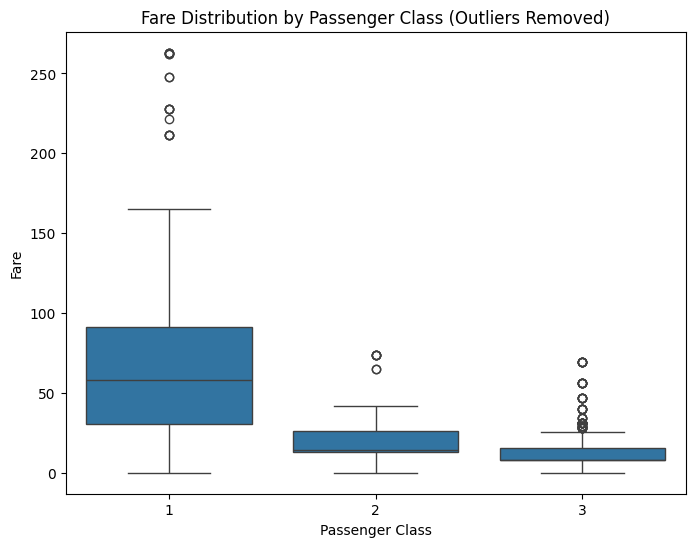

In [13]:
# Remove outliers in 'Fare' (e.g., fare > 300 considered as an outlier)
titanic_data = titanic_data[titanic_data['Fare'] < 300]

# Boxplot for Fare by Passenger Class after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Passenger Class (Outliers Removed)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


Step 7: Save the Cleaned Dataset

In [14]:
# Save the cleaned dataset to a new CSV file
titanic_data.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")


Cleaned dataset saved as 'titanic_cleaned.csv'
